In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Thesis Satria\Dataset Gabungan.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Cyber_MBC\AppData\Local\Temp\ipykernel_12332\878996148.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("D:\Thesis Satria\Dataset Gabungan.csv")


In [3]:
print("Shape Dataset:", df.shape)

Shape Dataset: (46686579, 47)


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 34


In [5]:
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
l

In [6]:
df_clean = df.drop_duplicates().dropna()
print("Shape sesudah cleaning:", df_clean.shape)

Shape sesudah cleaning: (46686545, 47)


In [7]:
print('Nama Kolom :')
print(df_clean.columns)

Nama Kolom :
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


In [8]:
print("Jumlah Serangan Pada Dataset: \n")
df_clean['label'].value_counts()

Jumlah Serangan Pada Dataset: 



label
DDoS-ICMP_Flood            7200488
DDoS-UDP_Flood             5412287
DDoS-TCP_Flood             4497665
DDoS-PSHACK_Flood          4094751
DDoS-SYN_Flood             4059188
DDoS-RSTFINFlood           4045282
DDoS-SynonymousIP_Flood    3598138
DoS-UDP_Flood              3318594
DoS-TCP_Flood              2671445
DoS-SYN_Flood              2028834
BenignTraffic              1098195
Mirai-greeth_flood          991866
Mirai-udpplain              890576
Mirai-greip_flood           751682
DDoS-ICMP_Fragmentation     452489
MITM-ArpSpoofing            307593
DDoS-UDP_Fragmentation      286925
DDoS-ACK_Fragmentation      285104
DNS_Spoofing                178910
Recon-HostDiscovery         134377
Recon-OSScan                 98259
Recon-PortScan               82280
DoS-HTTP_Flood               71864
VulnerabilityScan            37382
DDoS-HTTP_Flood              28790
DDoS-SlowLoris               23426
DictionaryBruteForce         13064
BrowserHijacking              5859
CommandInjecti

In [9]:
# Pengelompokan Jenis Serangan

attack_map = {
    'BenignTraffic': 'BENIGN',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-HTTP_Flood': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'Recon-HostDiscovery': 'Recon',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'Recon-PingSweep': 'Recon',
    'DictionaryBruteForce': 'Brute Force',
    'CommandInjection': 'Injection',
    'SqlInjection': 'Injection',
    'MITM-ArpSpoofing': 'Network Attack',
    'DNS_Spoofing': 'Network Attack',
    'BrowserHijacking': 'Network Attack',
    'VulnerabilityScan': 'Network Attack',
    'XSS': 'Network Attack',
    'Uploading_Attack': 'Network Attack',
    'Backdoor_Malware': 'Malware',
}

df_clean['Attack Type'] = df_clean['label'].str.strip().map(attack_map)

df_clean.drop('label', axis = 1, inplace = True)

print("Jumlah Serangan Setelah digabungkan: \n")
df_clean['Attack Type'].value_counts()

Jumlah Serangan Setelah digabungkan: 



Attack Type
DDoS              33984533
DoS                8090737
Mirai              2634124
BENIGN             1098195
Network Attack      534842
Recon               317178
Brute Force          13064
Injection            10654
Malware               3218
Name: count, dtype: int64

In [10]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
flow_duration,46686545.0,5.765454e+00,2.850343e+02,0.000000,0.000000e+00,0.000000e+00,1.051384e-01,3.943572e+05
Header_Length,46686545.0,7.670602e+04,4.613319e+05,0.000000,5.400000e+01,5.400000e+01,2.805600e+02,9.907148e+06
Protocol Type,46686545.0,9.065694e+00,8.945535e+00,0.000000,6.000000e+00,6.000000e+00,1.433000e+01,4.700000e+01
Duration,46686545.0,6.635072e+01,1.401919e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,46686545.0,9.064063e+03,9.956253e+04,0.000000,2.091856e+00,1.575423e+01,1.173848e+02,8.388608e+06
Srate,46686545.0,9.064063e+03,9.956253e+04,0.000000,2.091856e+00,1.575423e+01,1.173848e+02,8.388608e+06
Drate,46686545.0,5.463953e-06,7.250769e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.971522e+01
fin_flag_number,46686545.0,8.657207e-02,2.812070e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,46686545.0,2.073353e-01,4.053978e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
rst_flag_number,46686545.0,9.050466e-02,2.869034e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [11]:
# Bersihkan dan konversi ke lowercase
df_clean['Attack Type Clean'] = df_clean['Attack Type'].astype(str).str.strip().str.lower()

# Konversi label: 0 jika benign, 1 untuk serangan lainnya
df_clean['Attack'] = df_clean['Attack Type Clean'].apply(lambda x: 0 if x == 'benign' else 1)

# Tampilkan distribusi hasil konversi
print("\nDistribusi biner Attack setelah perbaikan:")
print(df_clean['Attack'].value_counts())


Distribusi biner Attack setelah perbaikan:
Attack
1    45588350
0     1098195
Name: count, dtype: int64


In [12]:
correlation = df_clean.corr(numeric_only=True)
corr_attack = correlation['Attack'].drop('Attack').sort_values(ascending=False)

In [13]:
# Korelasi Antar Fitur

corr = df_clean.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack
flow_duration,1.00,0.01,0.00,0.04,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,0.02,0.00,0.00,-0.00,0.00,-0.00,0.02,0.02,-0.00,0.02,0.00,-0.00,-0.00,0.01,-0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.00,-0.00,0.01,-0.00,0.02,0.01,0.02,0.01,-0.00,-0.00,0.01,0.02,0.01,0.07,-0.00,-0.02
Header_Length,0.01,1.00,0.05,0.32,-0.01,-0.01,-0.00,-0.05,-0.08,-0.05,-0.03,0.19,-0.00,-0.00,-0.05,-0.00,-0.05,0.52,0.75,-0.01,0.29,-0.00,-0.00,-0.00,-0.00,-0.00,-0.03,0.11,-0.00,-0.00,-0.07,0.00,0.00,0.41,0.34,0.39,0.42,0.33,0.43,0.00,-0.00,0.41,0.33,0.21,0.27,-0.00,-0.31
Protocol Type,0.00,0.05,1.00,-0.01,0.02,0.02,-0.00,-0.11,-0.17,-0.11,-0.11,-0.12,-0.00,-0.00,-0.11,-0.16,-0.10,-0.02,-0.03,-0.08,-0.07,0.01,-0.00,-0.00,-0.00,-0.00,-0.39,0.45,0.00,-0.01,-0.40,0.01,0.01,0.33,0.58,0.14,0.34,-0.03,0.34,0.00,-0.00,0.45,-0.03,-0.02,0.03,-0.00,0.03
Duration,0.04,0.32,-0.01,1.00,-0.01,-0.01,-0.00,-0.05,-0.08,-0.04,-0.02,0.31,0.01,0.00,-0.03,0.10,-0.03,0.27,0.45,-0.02,0.40,0.02,0.00,-0.00,0.00,0.00,0.07,-0.03,-0.00,-0.02,-0.06,0.02,0.02,0.25,0.08,0.34,0.25,0.34,0.21,0.00,0.00,0.24,0.34,0.21,0.45,0.00,-0.54
Rate,-0.00,-0.01,0.02,-0.01,1.00,1.00,-0.00,0.00,-0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.00,-0.03,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.04,0.04,0.00,-0.00,0.01,0.00,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,-0.01,0.00,0.01
Srate,-0.00,-0.01,0.02,-0.01,1.00,1.00,-0.00,0.00,-0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.00,-0.03,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.04,0.04,0.00,-0.00,0.01,0.00,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,-0.01,0.00,0.01
Drate,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
fin_flag_number,-0.01,-0.05,-0.11,-0.05,0.00,0.00,-0.00,1.00,-0.16,0.98,-0.10,-0.12,-0.00,-0.00,0.99,-0.15,0.85,-0.03,-0.04,0.04,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.27,-0.16,-0.00,-0.00,-0.14,0.00,0.00,-0.09,-0.08,-0.07,-0.09,-0.06,-0.09,0.00,0.00,-0.10,-0.06,-0.03,-0.10,0.00,0.05
syn_flag_number,-0.01,-0.08,-0.17,-0.08,-0.03,-0.03,0.00,-0.16,1.00,-0.16,-0.16,-0.18,0.00,0.00,-0.16,0.83,-0.13,-0.04,-0.06,0.07,0.02,-0.01,-0.00,0.00,-0.00,0.00,0.44,-0.27,-0.00,-0.00,-0.23,0.01,0.01,-0.14,-0.14,-0.12,-0.15,-0.10,-0.15,-0.00,0.00,-0.16,-0.10,-0.05,-0.11,0.00,0.08
rst_flag_number,-0.01,-0.05,-0.11,-0.04,0.00,0.00,-0.00,0.98,-0.16,1.00,-0.10,-0.10,-0.00,-0.00,0.96,-0.14,0.87,-0.03,-0.04,0.04,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.27,-0.16,-0.00,-0.00,-0.14,0.00,0.00,-0.09,-0.08,-0.07,-0.09,-0.06,-0.09,0.00,0.00,-0.10,-0.06,-0.03,-0.09,0.00,0.05


In [14]:
positively_correlated_features = corr_attack[corr_attack > 0]
print("\nFitur-fitur yang berkorelasi positif dengan serangan (Attack):")
print(positively_correlated_features)


Fitur-fitur yang berkorelasi positif dengan serangan (Attack):
syn_flag_number    0.079365
ICMP               0.068670
UDP                0.054616
rst_flag_number    0.048934
fin_flag_number    0.047780
fin_count          0.041078
psh_flag_number    0.038353
Protocol Type      0.027288
ack_count          0.025655
Rate               0.011089
Srate              0.011089
IPv                0.008246
LLC                0.008246
HTTP               0.007037
SSH                0.000993
DHCP               0.000203
ece_flag_number    0.000189
Weight             0.000168
cwr_flag_number    0.000132
Number             0.000117
Drate              0.000117
IRC                0.000060
SMTP               0.000039
Telnet             0.000023
Name: Attack, dtype: float64


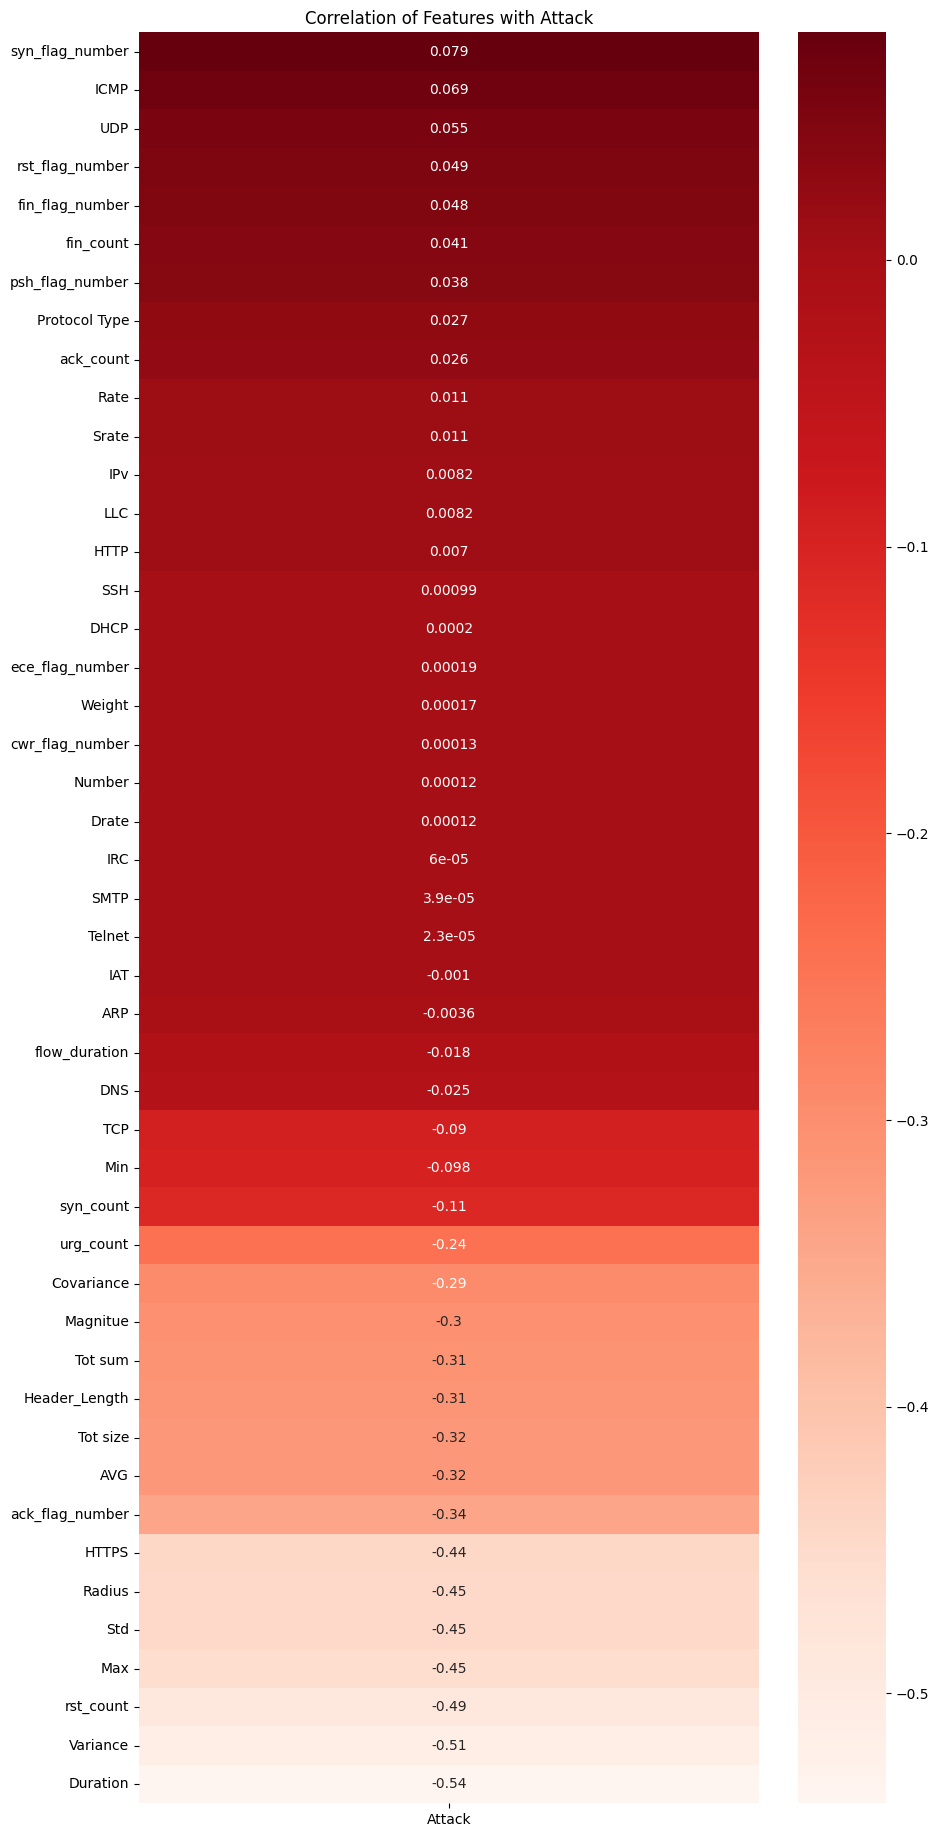

In [15]:
plt.figure(figsize=(10, len(corr_attack) // 2))
sns.heatmap(corr_attack.to_frame(), annot=True, cmap='Reds')
plt.title("Correlation of Features with Attack")
plt.show()

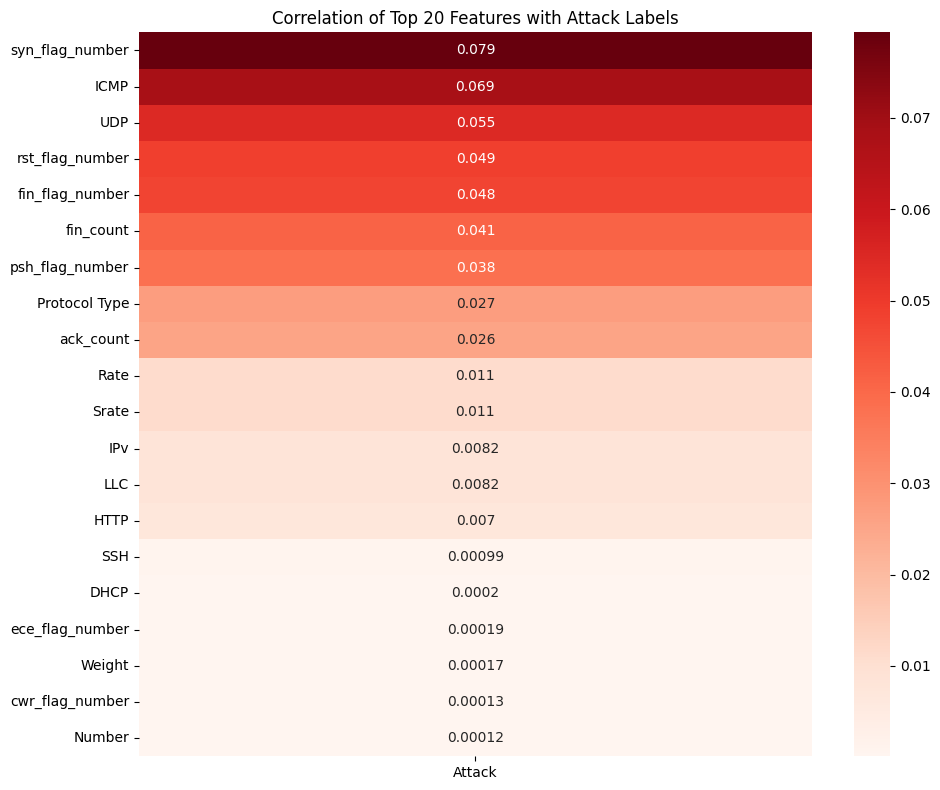

In [17]:


# Daftar fitur yang ingin ditampilkan (urutkan sesuai urutan yang kamu berikan)
selected_features = [
    'syn_flag_number', 'ICMP', 'UDP', 'rst_flag_number', 'fin_flag_number',
    'fin_count', 'psh_flag_number', 'Protocol Type', 'ack_count', 'Rate',
    'Srate', 'IPv', 'LLC', 'HTTP', 'SSH', 'DHCP',
    'ece_flag_number', 'Weight', 'cwr_flag_number', 'Number'
]

# Ambil subset dari Series corr_attack
subset_corr = corr_attack.loc[selected_features]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr.to_frame(), annot=True, cmap='Reds', cbar=True)
plt.title("Correlation of Top 20 Features with Attack Labels")
plt.tight_layout()
plt.show()
